# Fonctions Fournies

In [57]:
import io
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

#Définition des nucléotides
nucleotide = {'A':0,'C':1,'G':2,'T':3}
nucleotide_indetermine = {'A':0,'C':1,'G':2,'T':3,'N':-1}

def decode_sequence(sequence):
    inv_nucleotide = {v:k for k, v in nucleotide_indetermine.items()}
    to_str = ""
    for i in sequence:
        if(i in inv_nucleotide):
            to_str += inv_nucleotide[i]
        else:
            to_str += 'N'
    return to_str
    

def encode_sequence(string):
    to_list = []
    for base in string:
        if(base in nucleotide_indetermine):
            to_list.append(nucleotide_indetermine[base])
    return to_list

def read_fasta(fasta_filepath): #lit un fichier fasta et renvoie un dictionnaire des séquences encodées comme des listes d’entier
    fasta_file = io.open(fasta_filepath, 'r')
    current_sequence = ""
    sequences_dict = {}
    for line in fasta_file.readlines():
        if(line[0] == '>'):
            current_sequence = line
            sequences_dict[line] = []
        else:
            for nucl in line:
                if(nucl in nucleotide_indetermine):
                    sequences_dict[current_sequence].append(nucleotide_indetermine[nucl])

    return sequences_dict
    
def nucleotide_count(sequence): #compte les occurences de chaque lettre 
    count = [0 for k in nucleotide]
    for nucl in sequence:
        if(nucl >= 0):
            count[nucl] += 1
    return count

def nucleotide_frequency(sequence):
    count = [0 for k in nucleotide]
    n_nucl = 0.
    for nucl in sequence:
        if(nucl >= 0):
            count[nucl] += 1
            n_nucl += 1.
    return count/(np.sum(count))

# Chemins des fichiers 

In [58]:
# le chemin de chaque fichier FASTA

fname_regulateur_seq_PHO ="C:/Users/Assia bourai/Desktop/3I005/TME/Projet 3/sequences/regulatory_seq_PHO.fasta"
fname_regulateur_seq_GAL ="C:/Users/Assia bourai/Desktop/3I005/TME/Projet 3/sequences/regulatory_seqs_GAL.fasta"
fname_regulateur_seq_MET ="C:/Users/Assia bourai/Desktop/3I005/TME/Projet 3/sequences/regulatory_seqs_MET.fasta"
fname_S_CEREVISAE ="C:/Users/Assia bourai/Desktop/3I005/TME/Projet 3/sequences/yeast_s_cerevisae_genomic_chr1-4.fna"

"""
fname_regulateur_seq_PHO ="C:/Users/ING-FLUX/Desktop/3I005/Projet-3/sequences/regulatory_seq_PHO.fasta"
fname_regulateur_seq_GAL ="C:/Users/ING-FLUX/Desktop/3I005/Projet-3/sequences/regulatory_seqs_GAL.fasta"
fname_regulateur_seq_MET ="C:/Users/ING-FLUX/Desktop/3I005/Projet-3/sequences/regulatory_seqs_MET.fasta"
fname_S_CEREVISAE ="C:/Users/ING-FLUX/Desktop/3I005/Projet-3/sequences/yeast_s_cerevisae_genomic_chr1-4.fna"

"""


'\nfname_regulateur_seq_PHO ="C:/Users/ING-FLUX/Desktop/3I005/Projet-3/sequences/regulatory_seq_PHO.fasta"\nfname_regulateur_seq_GAL ="C:/Users/ING-FLUX/Desktop/3I005/Projet-3/sequences/regulatory_seqs_GAL.fasta"\nfname_regulateur_seq_MET ="C:/Users/ING-FLUX/Desktop/3I005/Projet-3/sequences/regulatory_seqs_MET.fasta"\nfname_S_CEREVISAE ="C:/Users/ING-FLUX/Desktop/3I005/Projet-3/sequences/yeast_s_cerevisae_genomic_chr1-4.fna"\n\n'

# 2 Préliminaires: données et lecture des fichiers 

## concaténation des trois fichiers en un seul nommé "sequence"

In [59]:
pho=read_fasta(fname_regulateur_seq_PHO)
gal=read_fasta(fname_regulateur_seq_GAL)
met=read_fasta(fname_regulateur_seq_MET)
sequence=[]
PHO=[]
GAL=[]
MET=[]
for i in pho:
    sequence = sequence + pho[i]
    PHO+= pho[i]
for i in gal:
    sequence = sequence + gal[i]
    GAL+=gal[i]
for i in met:
    MET+=met[i]
    sequence = sequence + met[i]

In [60]:
len(sequence)

16812

In [61]:
print(len(GAL))

5612


## 2.1 Lecture des fichiers : calcul du nombre de séquences ainsi que la taille de chaque fichier 

In [62]:
base_cerevisa=read_fasta(fname_S_CEREVISAE)
print("la base S_CEREVISAE comporte  ",len(base_cerevisa)," séquences (chromosomes)") # Nous avons 4 chromosomes
for i in base_cerevisa:
 
    print("la séquence ",i," est de taille",len(base_cerevisa[i])," et a une distribution de ",nucleotide_count(base_cerevisa[i])) # taille de chaque chromosome


la base S_CEREVISAE comporte   4  séquences (chromosomes)
la séquence  >NC_001133.9 Saccharomyces cerevisiae S288c chromosome I, complete sequence
  est de taille 200487  et a une distribution de  [59043, 41019, 41611, 58814]
la séquence  >NC_001134.8 Saccharomyces cerevisiae S288c chromosome II, complete sequence
  est de taille 713664  et a une distribution de  [212499, 144544, 142052, 214569]
la séquence  >NC_001135.5 Saccharomyces cerevisiae S288c chromosome III, complete sequence
  est de taille 275706  et a une distribution de  [82833, 57146, 54745, 80982]
la séquence  >NC_001136.10 Saccharomyces cerevisiae S288c chromosome IV, complete sequence
  est de taille 1325996  et a une distribution de  [399967, 263234, 264755, 398040]


In [63]:
base_PHO=read_fasta(fname_regulateur_seq_PHO)
print("la base PHO comporte  ",len(base_PHO)," séquences (chromosomes)") # Nous avons 4 chromosomes
for i in base_PHO:
 
    print("la séquence ",i," est de taille",len(base_PHO[i])," et a une distribution de ",nucleotide_count(base_PHO[i])) # taille de chaque chromosome


la base PHO comporte   5  séquences (chromosomes)
la séquence  >PHO5	PHO5; upstream from -800 to -1; size: 800; feature type:cds; location: Saccharomyces_cerevisiae:NC_001134.7:430946:431745:R
  est de taille 800  et a une distribution de  [255, 160, 158, 227]
la séquence  >PHO8	PHO8; upstream from -800 to -1; size: 800; feature type:cds; location: Saccharomyces_cerevisiae:NC_001136.8:1420243:1421042:R
  est de taille 800  et a une distribution de  [267, 162, 198, 173]
la séquence  >PHO11	PHO11; upstream from -800 to -1; size: 800; feature type:cds; location: Saccharomyces_cerevisiae:NC_001133.7:224651:225450:D
  est de taille 800  et a une distribution de  [289, 145, 139, 227]
la séquence  >PHO81	PHO81; upstream from -800 to -1; size: 800; feature type:cds; location: Saccharomyces_cerevisiae:NC_001139.8:958214:959013:R
  est de taille 800  et a une distribution de  [251, 145, 145, 259]
la séquence  >PHO84	PHO84; upstream from -800 to -1; size: 800; feature type:cds; location: Saccharo

In [64]:
base_GAL=read_fasta(fname_regulateur_seq_GAL)
print("la base GAL comporte  ",len(base_GAL)," séquences (chromosomes)") # Nous avons 4 chromosomes
for i in base_GAL:
 
    print("la séquence ",i," est de taille",len(base_GAL[i])," et a une distribution de ",nucleotide_count(base_GAL[i])) # taille de chaque chromosome


la base GAL comporte   7  séquences (chromosomes)
la séquence  >GAL1	GAL1; upstream from -800 to -1; size: 800; feature type:cds; location: Saccharomyces_cerevisiae:NC_001134.7:278221:279020:D
  est de taille 800  et a une distribution de  [262, 169, 123, 246]
la séquence  >GAL2	GAL2; upstream from -800 to -1; size: 800; feature type:cds; location: Saccharomyces_cerevisiae:NC_001144.4:289413:290212:D
  est de taille 800  et a une distribution de  [256, 154, 163, 227]
la séquence  >GAL3	GAL3; upstream from -800 to -1; size: 800; feature type:cds; location: Saccharomyces_cerevisiae:NC_001136.8:462631:463430:D
  est de taille 800  et a une distribution de  [248, 180, 134, 238]
la séquence  >GAL7	GAL7; upstream from -800 to -1; size: 800; feature type:cds; location: Saccharomyces_cerevisiae:NC_001134.7:275528:276327:R
  est de taille 800  et a une distribution de  [260, 135, 156, 249]
la séquence  >GAL10	GAL10; upstream from -800 to -1; size: 800; feature type:cds; location: Saccharomyces_

In [65]:
base_MET=read_fasta(fname_regulateur_seq_MET)
print("la base MET  ",len(base_MET)," séquences (chromosomes)") # Nous avons 4 chromosomes
for i in base_MET:
 
    print("la séquence ",i," est de taille",len(base_MET[i])," et a une distribution de ",nucleotide_count(base_MET[i])) # taille de chaque chromosome


la base MET   9  séquences (chromosomes)
la séquence  >MET1	MET1; upstream from -800 to -1; size: 800; feature type:cds; location: Saccharomyces_cerevisiae:NC_001143.7:570454:571253:D
  est de taille 800  et a une distribution de  [244, 149, 124, 283]
la séquence  >MET2	MET2; upstream from -800 to -1; size: 800; feature type:cds; location: Saccharomyces_cerevisiae:NC_001146.6:116549:117348:D
  est de taille 800  et a une distribution de  [261, 154, 128, 257]
la séquence  >MET3	MET3; upstream from -800 to -1; size: 800; feature type:cds; location: Saccharomyces_cerevisiae:NC_001142.7:455432:456231:D
  est de taille 800  et a une distribution de  [288, 138, 132, 242]
la séquence  >MET6	MET6; upstream from -800 to -1; size: 800; feature type:cds; location: Saccharomyces_cerevisiae:NC_001137.2:342164:342963:R
  est de taille 800  et a une distribution de  [253, 166, 139, 242]
la séquence  >MET14	MET14; upstream from -800 to -1; size: 800; feature type:cds; location: Saccharomyces_cerevisia

## 2.2 Calcul de fréquence de lettres (A,C,G,T) de chaque séquence

In [66]:
for i in base_cerevisa:
    print("la séquence ",i," a une frequence de lettre de",nucleotide_frequency(base_cerevisa[i])) 


la séquence  >NC_001133.9 Saccharomyces cerevisiae S288c chromosome I, complete sequence
  a une frequence de lettre de [0.2944979  0.20459681 0.20754962 0.29335568]
la séquence  >NC_001134.8 Saccharomyces cerevisiae S288c chromosome II, complete sequence
  a une frequence de lettre de [0.29775777 0.20253789 0.19904605 0.30065829]
la séquence  >NC_001135.5 Saccharomyces cerevisiae S288c chromosome III, complete sequence
  a une frequence de lettre de [0.3004396  0.20727151 0.19856296 0.29372593]
la séquence  >NC_001136.10 Saccharomyces cerevisiae S288c chromosome IV, complete sequence
  a une frequence de lettre de [0.30163515 0.19851794 0.19966501 0.3001819 ]


**Calcul des fréquences de la base cerevisae**

In [67]:
liste_cer=[] # liste qui contient toutes les séquences 
for c in base_cerevisa:
    liste_cer+=base_cerevisa[c]
a,c,g,t=nucleotide_frequency(liste_cer)
print("Fréquence des nucléotides de base_cerevisae :")
print("A : ",a)
print("C : ",c)
print("G : ",g)
print("T : ",t)

Fréquence des nucléotides de base_cerevisae :
A :  0.29983548323371834
C :  0.2011019721740499
G :  0.19999697915577738
T :  0.29906556543645435


## Remarque
**On remarque les deux lettres A et T sont plus fréquentes que C et G**

## Question 2.3

In [68]:
def logproba(liste_entiers, m):
    s=0
    for i in liste_entiers:
        s+=math.log(m[i])
    return s

In [69]:
for i in base_cerevisa:
    print("la séquence ",i," a une frequence de lettre de", logproba(base_cerevisa[i],nucleotide_frequency(base_cerevisa[i]))) 


la séquence  >NC_001133.9 Saccharomyces cerevisiae S288c chromosome I, complete sequence
  a une frequence de lettre de -274820.7121013735
la séquence  >NC_001134.8 Saccharomyces cerevisiae S288c chromosome II, complete sequence
  a une frequence de lettre de -975417.1460280952
la séquence  >NC_001135.5 Saccharomyces cerevisiae S288c chromosome III, complete sequence
  a une frequence de lettre de -377254.6802453308
la séquence  >NC_001136.10 Saccharomyces cerevisiae S288c chromosome IV, complete sequence
  a une frequence de lettre de -1810530.5967058528


In [70]:
print("log_proba de la base cerevisae", logproba(liste_cer,nucleotide_frequency(liste_cer))) 


log_proba de la base cerevisae -3438164.462646954


## Question 2.4

In [71]:
def logprobafast(liste_entiers, m):
    s=0
    for i in range(len(liste_entiers)):
        s+=liste_entiers[i]*math.log(m[i])
    return s

In [72]:
for i in base_cerevisa:
    print("la séquence ",i," a une frequence de lettre de", logprobafast(nucleotide_count(base_cerevisa[i]),nucleotide_frequency(base_cerevisa[i]))) 


la séquence  >NC_001133.9 Saccharomyces cerevisiae S288c chromosome I, complete sequence
  a une frequence de lettre de -274820.7121015837
la séquence  >NC_001134.8 Saccharomyces cerevisiae S288c chromosome II, complete sequence
  a une frequence de lettre de -975417.1460256312
la séquence  >NC_001135.5 Saccharomyces cerevisiae S288c chromosome III, complete sequence
  a une frequence de lettre de -377254.68024543393
la séquence  >NC_001136.10 Saccharomyces cerevisiae S288c chromosome IV, complete sequence
  a une frequence de lettre de -1810530.596715566


In [73]:
print("log_proba_fast de base cerevisae", logprobafast(nucleotide_count(liste_cer),nucleotide_frequency(liste_cer))) 


log_proba_fast de base cerevisae -3438164.4626395022


# 3.1 Description Empirique , préliminaires 


**3.1.1.a)** fonction code(m, k) qui renvoie pour un mot m de taille k son indice

In [74]:
def code(m,k):
    indice=0
    p=k-1
    for i in m:
        indice+=i*4**p
        p-=1
    return indice     

In [75]:
code([1,2,0],3)

24

**3.1.1.b)** fonction inverse(i,k) qui connaissant un indice i et la longueur du mot k renvoie la séquence de longueur k correspondante.

In [76]:
def inverse(i,k):#i etant l indice dans le tableau et k etait la longueur du mot
    l=[] # liste du mot
    indice=i
    for j in range(k):
        l.append(indice%4)
        indice=indice//4
    l.reverse()
    return l
    

In [77]:
inverse(24,3)

[1, 2, 0]

**3.1.1.c)** fonction qui compte le nombre d’occurrences pour tous les mots de
taille k dans une séquence d’ADN


In [78]:
# il faut que seq soit une liste de caractère pour qu'à la fin ça me donne un affichage de type lettre/freq (c'est pour ça que je la décode)
def calculFrequenceMot(seq,k):

    dic=dict()
    #seq=decode_sequence(seq)
    taille = len(seq)   # taille de toute la séquence 
    liste=[]
    for i in range(taille - k+1):
        mot = seq[i:k+i] # récupérer le mot de longuer k 
        liste.append(mot) # ajouter le mot à la liste


    for i in range(len(liste)):
        if(tuple(liste[i]) not in dic.keys()): # ajouter le mot au dictionnaire 
            dic[tuple(liste[i])] = 1 
        else: # incrémenter le nombre d'occurence du mot 
            dic[tuple(liste[i])] +=1
    return dic


In [79]:
#s= "AAATGCT"
s=[0,0,0,3,2,1,3]
print("fréquence des chaines de caractère de taille 2:", calculFrequenceMot(s, 2))


fréquence des chaines de caractère de taille 2: {(0, 0): 2, (0, 3): 1, (3, 2): 1, (2, 1): 1, (1, 3): 1}


In [80]:
calculFrequenceMot(sequence,2)

{(3, 3): 1725,
 (3, 0): 1341,
 (0, 1): 951,
 (1, 0): 1180,
 (0, 3): 1486,
 (3, 1): 1009,
 (1, 2): 566,
 (2, 2): 630,
 (2, 0): 890,
 (1, 3): 961,
 (3, 2): 965,
 (0, 0): 1924,
 (0, 2): 972,
 (2, 3): 867,
 (2, 1): 748,
 (1, 1): 590,
 (0, -1): 2,
 (-1, -1): 2,
 (-1, 2): 2}

**3.1.2)** fonction comptage_attendu qui prend en paramètres les fréquences des nucléotides, la longueur des mos, et la longueur du génome et renvoie la probabilité des mots de longueur k 

In [81]:
def comptage_attendu(freq,k,l):
    """ Fonction qui prend en paramètres les fréquences des nucléotides (freq), la longueur des mots(k), et la longueur du génome(l)
    et renvoie la probabilité des mots de longueur k 
    """
    dic = dict()
    nbMot=l-k+1# nombre de mots de la séquence de taille l
   # print(nbMot)
   # s=0
    for i in range(pow(4,k)):
        ind_mot=inverse(i,k)
        lp=logproba(ind_mot,freq) # log_proba du mot
        proba=math.exp(lp) # la probabilite du mot 
        dic[tuple(ind_mot)]=nbMot*proba
       # s+=nbMot*proba
    #print(s)
    return dic


In [82]:
comptage_attendu(nucleotide_frequency(sequence),2,len(sequence))


{(0, 0): 1693.6759353327764,
 (0, 1): 1046.9996691148071,
 (0, 2): 995.2528692161671,
 (0, 3): 1600.0237514671396,
 (1, 0): 1046.9996691148071,
 (1, 1): 647.2361590891534,
 (1, 2): 615.2472282427215,
 (1, 3): 989.1055918160497,
 (2, 0): 995.2528692161671,
 (2, 1): 615.2472282427215,
 (2, 2): 584.839314900222,
 (2, 3): 940.2201426147109,
 (3, 0): 1600.0237514671396,
 (3, 1): 989.1055918160497,
 (3, 2): 940.2201426147109,
 (3, 3): 1511.5500857346549}

**3.1.3)** Afficher avec un graphique 2D **le nombre attendu d’occurrences sur l’axe des X**
et **le nombre observé sur l’axe des Y** pour tout les mots de longueur
k pour les séquences PHO, GAL et MET. On testera avec k = 2; 4; 6; 8.
Pour évaluer si un mot a un comptage attendu est différent de son comptage observé
on les triez par rapport à l’enrichissement relatif (i.e. la droite y = x sur le
graphique 2D).

In [83]:
def Graphique2D(sequence,taille):
    nombre_attendu = comptage_attendu( nucleotide_frequency(sequence) , taille, len(sequence)) 
    nombre_observe = calculFrequenceMot(sequence,taille)
    #listeEtt = []
    X = [] #abscisse
    Y = [] #ordonnée
    #print(nombre_observe)
    #print(len(nombre_attendu))
    for i in nombre_attendu.keys():
        if i in nombre_observe.keys():
            #print (i)
            #print(nombre_observe.keys())
            X.append(nombre_attendu[i])
        #else:
            #X.append(0)
            Y.append(nombre_observe[i])   
        
    fig,ax=plt.subplots(figsize=(7, 7))
    ax.scatter(X,Y,color = "blue")
    ax.set_xlabel("Nombre Attendu")
    ax.set_ylabel("Nombre Observe")
    ax.set_title("Résultat du comptage pour des mots de taille "+repr(taille))
    lims = [
        np.min([ax.get_xlim(),ax.get_ylim()]),
        np.max([ax.get_xlim(),ax.get_ylim()]) 
    ]
    ax.plot(lims,lims,zorder=0,color="red")
 

### Graphes Pour PHO avec k € [2,4,6,8]

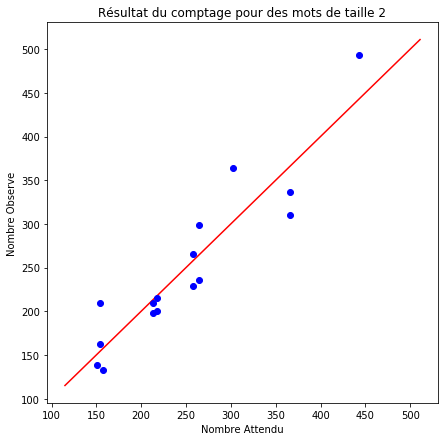

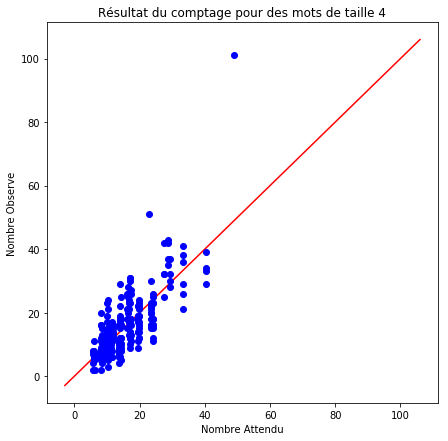

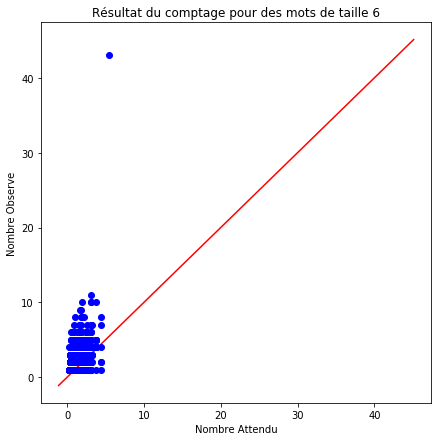

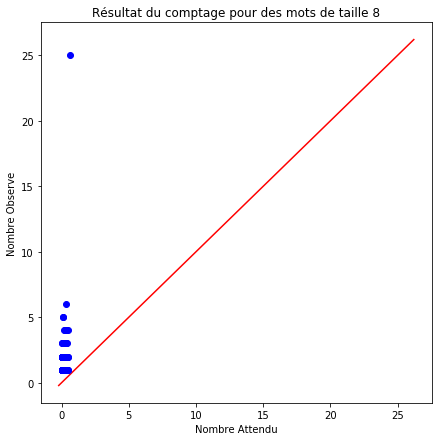

In [84]:
for k in [2,4,6,8]:
    Graphique2D(PHO,k)

### Graphes Pour MET avec k € [2,4,6,8]

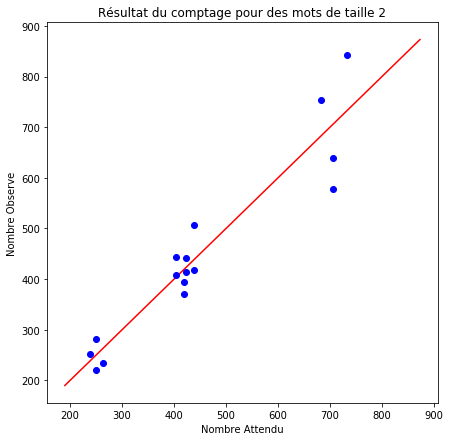

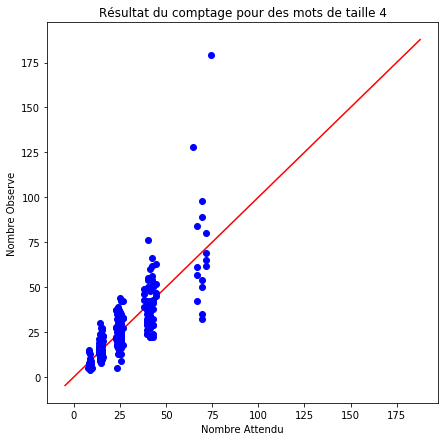

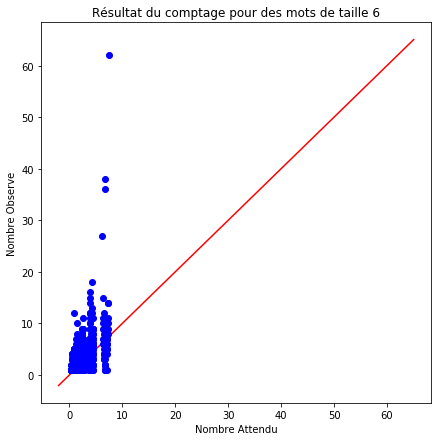

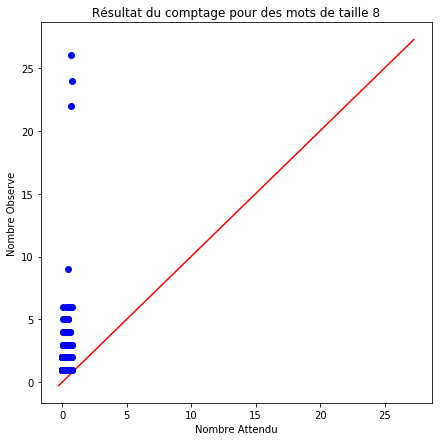

In [85]:
for k in [2,4,6,8]:
    Graphique2D(MET,k)

### Graphes Pour GAL avec k € [2,4,6,8]

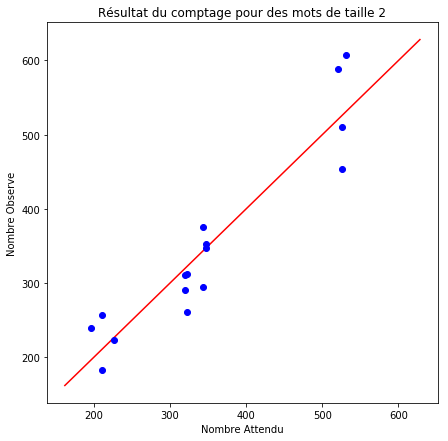

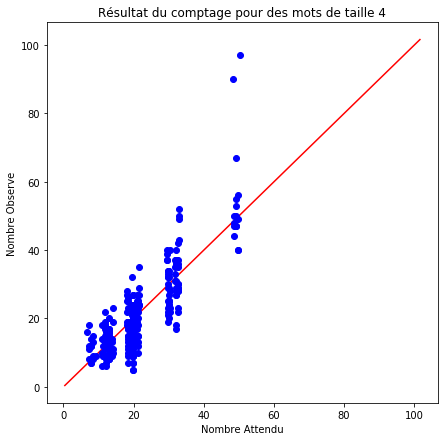

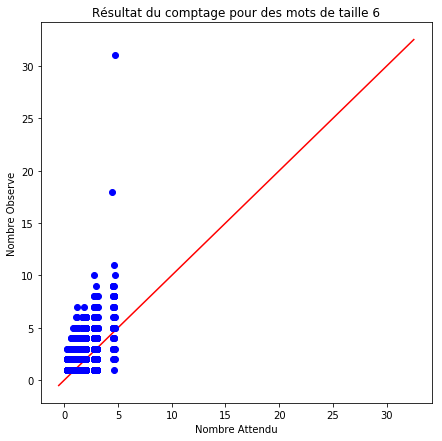

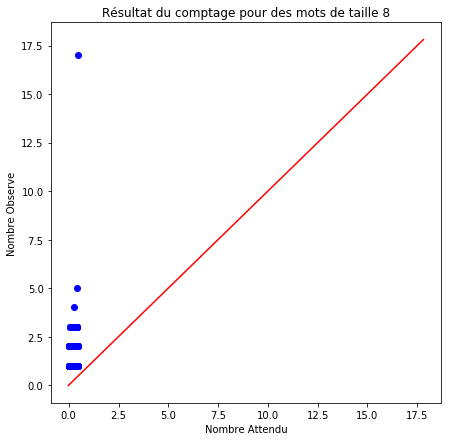

In [86]:
for k in [2,4,6,8]:
    Graphique2D(GAL,k)

# 3.2 Simulation des séquences aléatoires 

## Question 3.2.1

In [87]:
def simule_sequence(lg, m):
    """fonction qui génère une séquence aléatoire de longueur lg étant donné m les fréquences des lettres A,C,G,T"""
    return np.random.choice(4,lg, m) # permet de renvoyer une liste de longueur lg des lettre (a,c,t,g) [0,1,2,3]

## Question 3.2.2 
  

In [88]:
x=simule_sequence(100000,(a,c,g,t))
x

array([2, 1, 1, ..., 1, 1, 3])

In [91]:
print(nucleotide_frequency(x))
nf=nucleotide_frequency(x)
nombre_attendu = comptage_attendu(nf , 4, len(x)) 
nombre_observe = calculFrequenceMot(x,4)
#listeEtt = []
X = [] #abscisse
Y = [] #ordonnée
#print(nombre_observe)
#print(len(nombre_attendu))
for i in nombre_attendu.keys():
    if i in nombre_observe.keys():
        #print (i)
        #print(nombre_observe.keys())
        X.append(nombre_attendu[i])
    #else:
        #X.append(0)
        Y.append(nombre_observe[i])









[0.25066 0.2504  0.2498  0.24914]


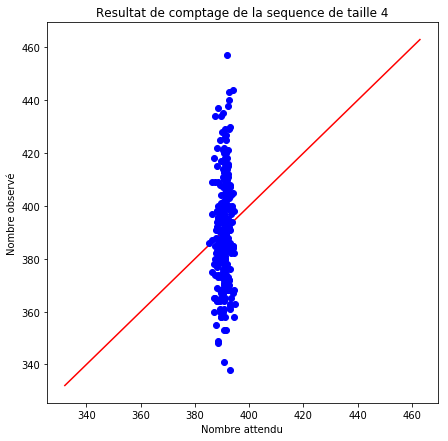

In [92]:
fig,ax=plt.subplots(figsize=(7, 7))
ax.scatter(X,Y,color = "blue")
ax.set_xlabel("Nombre attendu")
ax.set_ylabel("Nombre observé")
ax.set_title("Resultat de comptage de la sequence de taille "+repr(4))
lims = [
    np.min([ax.get_xlim(),ax.get_ylim()]),
    np.max([ax.get_xlim(),ax.get_ylim()]) 
]
ax.plot(lims,lims,zorder=0,color="red")




### Remarque

**On remarque qu'un grand nombre de points est est situé dans l'itervalle [380,400] (intervalle qui représente le nombre attendu) ceci s'explique par le fait que les probabilités d'apparition des lettres sont équiprobables**

## Question 3.2.3

In [35]:
def proba_empirique(mot, lg, N):
    """ Fonction qui estime la probabilité d’observer un mot un certain
    nombre N de fois dans une séquence de longueur lg """
    dic = dict()
    k = len(mot)

    
  #  seq=decode_sequence(seq)
    #print(mot)
 
    mot=tuple(mot)
    for i in range(N):
        seq = simule_sequence(lg, (a,c,g,t))
        x = calculFrequenceMot(seq, k)        
        if mot in x.keys():
       
            nb = x[mot]
        else:
            nb = 0
       # print(nb)
        if nb in dic:
         
            dic[nb] += 1
            #print(dic)
        else:
            dic[nb] = 1
    for i in dic:
        dic[i]=dic[i]/N
    
    return dic


In [36]:
proEmb = dict()
for mot in ["ATCTGC", "ATATAT", "TTTAAA", "AAAAAA"]:
    proEmb[mot]=proba_empirique(encode_sequence(mot),10000,100)
    print("Mot "+mot+":"+repr(proEmb[mot]))


Mot ATCTGC:{3: 0.25, 1: 0.23, 2: 0.22, 4: 0.08, 0: 0.11, 6: 0.04, 7: 0.02, 5: 0.05}
Mot ATATAT:{4: 0.17, 2: 0.22, 1: 0.21, 0: 0.07, 3: 0.19, 6: 0.07, 7: 0.01, 5: 0.05, 9: 0.01}
Mot TTTAAA:{4: 0.14, 1: 0.25, 3: 0.19, 2: 0.3, 6: 0.02, 5: 0.05, 0: 0.05}
Mot AAAAAA:{2: 0.13, 3: 0.17, 4: 0.16, 1: 0.21, 9: 0.02, 5: 0.08, 0: 0.16, 7: 0.02, 8: 0.02, 6: 0.03}


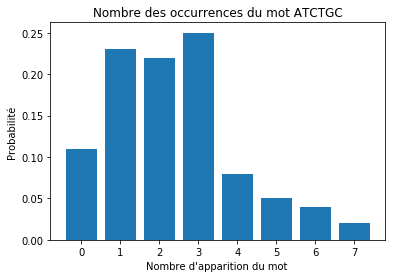

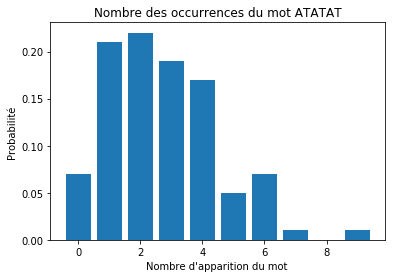

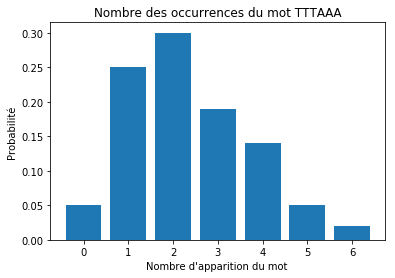

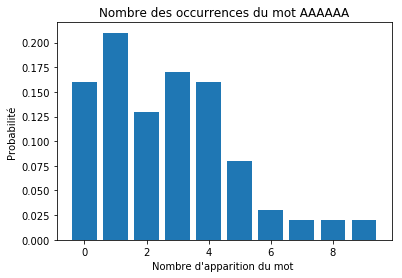

In [37]:
for mot in proEmb:
    fig, ax = plt.subplots()
    ax.bar(proEmb[mot].keys(), proEmb[mot].values())
    ax.set_axisbelow(True)
    ax.set_title("Nombre des occurrences du mot "+mot)
    ax.set_xlabel("Nombre d'apparition du mot ")
    ax.set_ylabel("Probabilité")

## Question 3.2.4
**On sait que les probabilités d'apparition de A et T sont superieures aux probabilités d'apparition de C et G.<br>
De plus la probabilité de A est quasiment égale à la probabilité d'apparition de la lettre T.<br>
On remarque aussi d'après la question précédente que la probabilité d'apparition des mots 'TTTAAA' et 'ATATAT' est identique à 1% près,
P('TTTAAA'>=1)=1-P('TTTAAA'=0)
sachant que: P('TTTAAA'=0)=0.11
alors: P('TTTAAA'>=1)=0.89.
P('ATATAT'>=1)=1-P('ATATAT'=0) 
sachant que: P('ATATAT'=0)=0.12 
alors:> P('ATATAT'>=1)=0.88.
sauf qu'on remarque que la distribution des deux mots diffère, celà est dû au fait que la fonction simule_sequence crée des séquences avec des permutations fréquentes de lettres (chevauchements)   d'où la différence de la distribution.**

## Question 3.2.5

**si on considère que le nombre d'ocurrences d'un mot dans des séquences aléatoires est une variable aléatoire notée X  qui suit une loi de bernoulli de paramère p (p=1 si X=x et 0 sinon),alors grace au théorème centrale limite X suit une loi normale de de moyenne p et de variance p(1-p)/N  on peut alors calculer un intervalle de confiance avec un risque =5%**

**Les histogrammes qui suivent illustrent les intervalles de confiance représentés en segments de couleur orange **

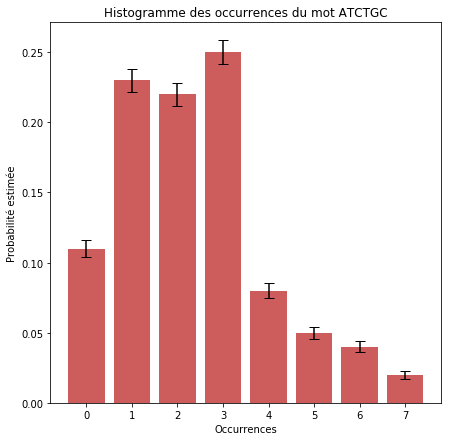

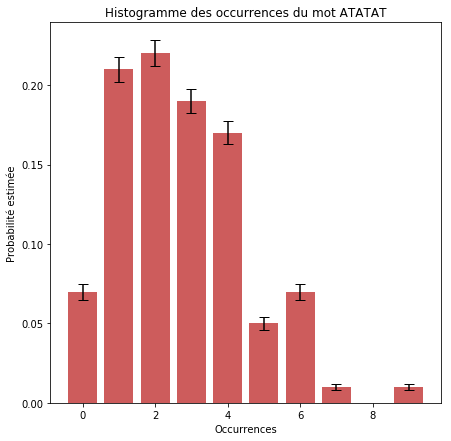

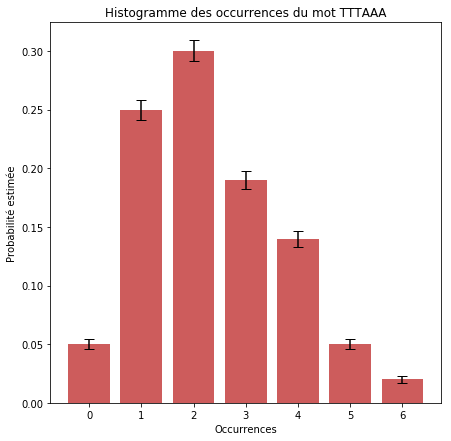

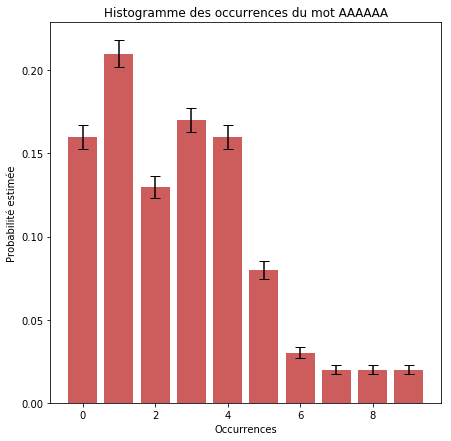

In [94]:
N=100

for mot in proEmb:
    X=[]
    Y=[]
    fig, ax = plt.subplots(figsize=(7, 7))
    for x in proEmb[mot].keys():
        X.append(x)
    for x in proEmb[mot].values():
        Y.append(x)
    #print(np.array(keys),np.array(Y))
    X=np.array(X)
    Y=np.array(Y)
    ax.bar(X, Y, yerr=1.96*np.sqrt(Y*(1-Y))/N, color='IndianRed', capsize=5)
    
    ax.set_axisbelow(True)
    ax.set_title("Histogramme des occurrences du mot "+mot)
    ax.set_xlabel("Occurrences")
    ax.set_ylabel("Probabilité estimée")
    plt.show()

# 3.3 Modèles de dinucléotides et trinucléotides 

## Question 3.3.1

**Le modèle décrit correspond à une chaîne de Markov d'ordre 1 car c'est un processus stochastique dans lequel on  détermine la lettre suivante d'une séquence en utilisant la lettre courante en d'autres termes l'élément M(i,j) est la probabilité de la lettre j sachant qu'on est sur la lettre i. M étant la matrice de transition correspondante à la chaîne de Markov.
La probabilité stationnaire correspond à la fréquence des lettres dans une séquence en utilisant la chaine de Markov (ie. la matrice de transition), elle est calculée de la manière qui suit:<br>
tant que  <br>   abs(P(n-1)-P(n))>=epsilon      alors   <br> P(n)=P(n-1)*M   <br>  avec P0 = fréquence des lettres et M = matrice de transition**

In [95]:
cerevisa=[]
for i in base_cerevisa:
    cerevisa +=base_cerevisa[i]
print(len(cerevisa))

2515853


## Question 3.3.2
fonction qui estime M à partir des mots de longueur 2

In [96]:
def Estime_Mat(seq):     
    M=np.zeros((4,4))
    #print(M)
    freq=calculFrequenceMot(seq,2)
    for i in freq.keys():
        #print(i[0])
        M[i[0],i[1]]=freq[i]
    for i in range(4):
        M[i,:] = M[i,:]/M[i,:].sum()
    return M

In [97]:
mat=Estime_Mat(cerevisa)
mat

array([[0.3250462 , 0.18551797, 0.20059204, 0.28884379],
       [0.33570778, 0.2092548 , 0.1575632 , 0.29747422],
       [0.31321125, 0.20244971, 0.20774423, 0.27659481],
       [0.24149361, 0.2103415 , 0.2227537 , 0.32541118]])

## Question 3.3.3

In [100]:
def simule_sequence_markov(M,l,m):
    """ Fonction qui simule une séquence de longueur l à partir de 
    la matrice de transition M et des fréquences initiales des lettres A,C,G,T"""
    seq_simul = np.zeros(l)
    #print(seq_simul)
    seq_simul[0] = simule_sequence(1,m)#choix de la premiere lettre
    for i in range(1, l):   
        seq_simul[i] = simule_sequence(1,tuple(M[int(seq_simul[i-1]),:]))
    return seq_simul



  

In [101]:
simule_sequence_markov(mat,50,(a,c,g,t))

array([1., 1., 2., 2., 3., 0., 3., 2., 0., 1., 1., 0., 1., 2., 1., 3., 3.,
       3., 1., 3., 1., 1., 0., 1., 2., 0., 2., 1., 3., 2., 1., 3., 0., 3.,
       1., 0., 1., 1., 1., 0., 0., 0., 0., 0., 2., 3., 3., 0., 2., 2.])

## Question 3.3.4

pour calculer la probabilité d'appartion d'un mot à une position donnée on doit calculer la probabilité d'avoir la première lettre du mot à la position donnée pour celà il faut calculer la probabilité stationnaire  P(l1)=pi(l1) ==> calculer la probabilité stationnaire (ça a été dit en cours)
pour la suite des lettres du mot (voir td P(ASSI))



In [44]:

"""
Calculer la probabilité stationnaire P1
"""

P0=[0,0,0,0]
P1=[a,c,g,t]
print(P1)
#print(abs(np.array(P0)-np.array(P1))>0.0001)
print(mat)
while (True):
    P0=P1
    P1=np.dot(P1,mat)
    x1=abs(np.array(P0)-np.array(P1))
    #print(x1)
    if(x1.all()<0.001):
        break
P1

[0.29983548323371834, 0.2011019721740499, 0.19999697915577738, 0.29906556543645435]
[[0.3250462  0.18551797 0.20059204 0.28884379]
 [0.33570778 0.2092548  0.1575632  0.29747422]
 [0.31321125 0.20244971 0.20774423 0.27659481]
 [0.24149361 0.2103415  0.2227537  0.32541118]]


array([0.29983559, 0.20110165, 0.19999708, 0.29906568])

In [45]:
def proba_position_mot(mat,mot):
    proba_pos=P1[mot[0]]
    for i in range(1,len(mot)):
        proba_pos*=mat[mot[i-1],mot[i]]
    return proba_pos

In [46]:
proba_position_mot(mat,[0,1,2,0,1,1])

0.00010656700438415992

## Question 3.3.5

In [102]:
def comptage_attendu_dinuc(P1,mat,k,l):
    """Déterminer à partir de la matrice de transition mat
    et de la probabilité stationnaire P1
    l'espérence du nombre d'occurences de chaque mot de 
    longueur k 
    
    """
    
    dic = dict()
    nbMot=l-k+1# nombre de mots de la séquence de taille l
   # print(nbMot)
   # s=0
    for i in range(pow(4,k)):
        ind_mot=inverse(i,k)
        lp=proba_position_mot(mat,ind_mot) # log_proba du mot
       # print(lp)
        dic[tuple(ind_mot)]=nbMot*lp
       # s+=nbMot*proba
    #print(s)
    return dic


In [103]:
comptage_attendu_dinuc(P1,mat,2,1000)

{(0, 0): 97.36295977877958,
 (0, 1): 55.5692672118694,
 (0, 2): 60.08448856802734,
 (0, 3): 86.51904279563672,
 (1, 0): 67.44387722019638,
 (1, 1): 42.03940397164194,
 (1, 2): 31.654534346623265,
 (1, 3): 59.76273478810977,
 (2, 0): 62.578694075345275,
 (2, 1): 40.448860833936436,
 (2, 2): 41.50668997310697,
 (2, 3): 55.262836695436135,
 (3, 0): 72.15022727999182,
 (3, 1): 62.84301830912359,
 (3, 2): 66.55136869006725,
 (3, 3): 97.22199546210796}

## Question 3.3.6
     comparaison du nombre attendu du modèle aléatoire et du modèle de dinucéotide 

In [107]:
cptmarkov=comptage_attendu_dinuc(P1,mat,2,1000)
cptnorm=comptage_attendu([a,c,g,t],2,1000)
print("mot         markov               proba_normal")
for i in range(len(cptmarkov)):

    print(decode_sequence(inverse(i,2)),"    ",cptmarkov[tuple(inverse(i,2))],"    ", cptnorm[tuple(inverse(i,2))])

mot         markov               proba_normal
AA      97.36295977877958      89.81141568899137
AC      55.5692672118694      60.23720949905397
AG      60.08448856802734      59.90622469956593
AT      86.51904279563672      89.5807978628733
CA      67.44387722019638      60.23720949905397
CC      42.03940397164194      40.40156120908005
CG      31.654534346623265      40.17956715014209
CT      59.76273478810977      60.08253234359973
GA      62.578694075345275      59.90622469956593
GC      40.448860833936436      40.17956715014209
GG      41.50668997310697      39.95879287976502
GT      55.262836695436135      59.752397447148525
TA      72.15022727999182      89.5807978628733
TC      62.84301830912359      60.08253234359973
TG      66.55136869006725      59.752397447148525
TT      97.22199546210796      89.35077221739634


**Pour des mots de longueur 2 et sur des séquences de taille 1000, les résultats de la comparaison entre le nombre de mots attendus en utilisant les modèles de nucléotides et dinucléotides  montrent que les mots AA,CA,TT,GA sont  plus fréquents que d'autres (AC,AT,CG,GT,TA).**

## Question 3.3.7

In [50]:
def GraphiqueMarkov(P1,mat,k,sequence):
    nombre_attendu = comptage_attendu_dinuc(P1 ,mat,k, len(sequence)) 
    nombre_observe = calculFrequenceMot(sequence,k)
    #listeEtt = []
    X = [] #abscisse
    Y = [] #ordonnée
    #print(nombre_observe)
    #print(len(nombre_attendu))
    for i in nombre_attendu.keys():
        if i in nombre_observe.keys():
            #print (i)
            #print(nombre_observe.keys())
            X.append(nombre_attendu[i])
        #else:
            #X.append(0)
            Y.append(nombre_observe[i])
        
        
        
        
        
    
    fig,ax=plt.subplots(figsize=(7, 7))
    ax.scatter(X,Y,color = "blue")
    ax.set_xlabel("Nombre Attendu")
    ax.set_ylabel("Nombre Observe")
    ax.set_title("Resultat de comptage de la sequence de taille "+repr(k))
    lims = [
        np.min([ax.get_xlim(),ax.get_ylim()]),
        np.max([ax.get_xlim(),ax.get_ylim()]) 
    ]
    ax.plot(lims,lims,zorder=0,color="red")
 

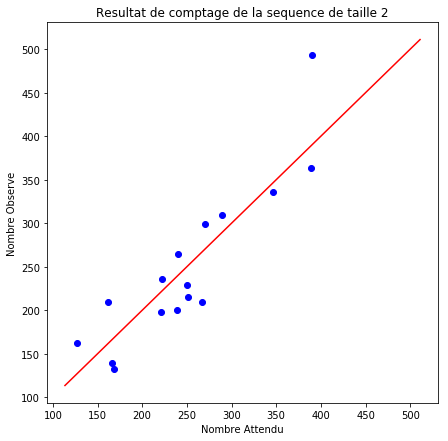

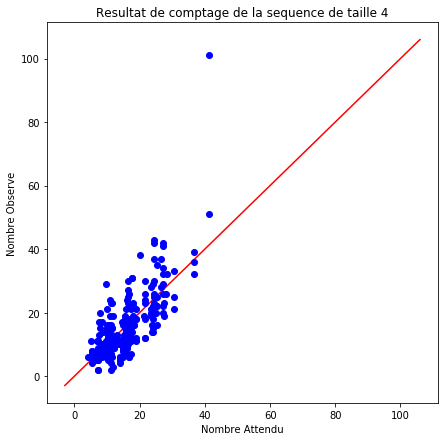

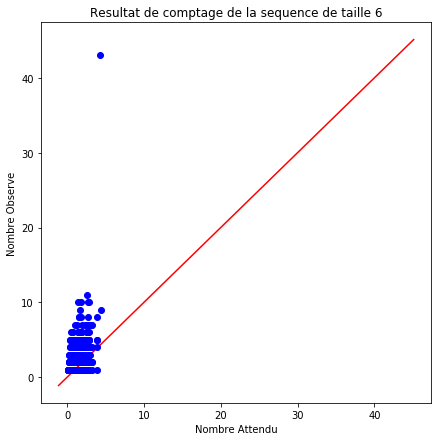

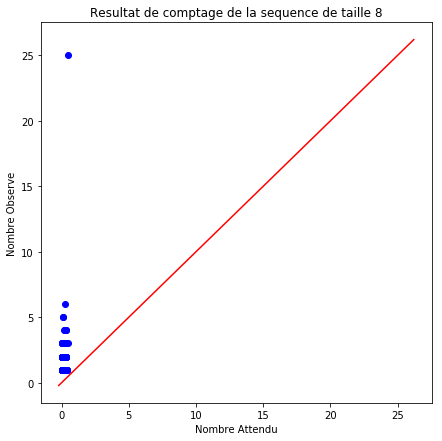

In [51]:
for k in [2,4,6,8]:
    GraphiqueMarkov(P1,mat,k,PHO)

**On observe un rapprochement entre le nombre attendu et le nombre observé, avec le modèle dinucléotides on a moins d'écart ceci s'explique par le fait que le modèle de markov est plus précis**